# Confirm Resize

The training dataset is resized into smaller size. Therefore, bounding box coordinates and mask images were generated.
This notebook is to to ensure

1. Mask images correctly mask vehicles
    1. So, only vehicles should be visible
1. Bounding boxes correctly capture vehicles

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from utils.image import read_image, draw_bbox
from utils.data import get_relevant_frames, get_boxes
%matplotlib inline

## Load LABELS CSV

In [2]:
labels = pd.read_csv("./labels_resized.csv")
labels.head()

xmin  xmax  ymin  ymax                                Frame  Label  \
0   392   266   482   343  data_resize\1479498371963069978.jpg    Car   
1    44   275   155   362  data_resize\1479498371963069978.jpg    Car   
2   134   273   204   346  data_resize\1479498371963069978.jpg    Car   
3   227   261   292   328  data_resize\1479498371963069978.jpg  Truck   
4   274   261   333   322  data_resize\1479498371963069978.jpg  Truck   

                                         Preview URL  \
0  http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...   
1  http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...   
2  http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...   
3  http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...   
4  http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...   

                           Mask  
0  mask\1479498371963069978.jpg  
1  mask\1479498371963069978.jpg  
2  mask\1479498371963069978.jpg  
3  mask\1479498371963069978.jpg  
4  mask\1479498371963069978.jpg

## Visualize mask images

In [3]:
paths = labels[["Frame", "Mask"]].as_matrix()
paths = paths[:, 0] + "!" + paths[:, 1]
paths = np.unique(paths)        

C:\Users\vicky\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [4]:
def temp(img_path: str, mask_path: str) -> None:
    """Open IMAGE and MASK and plot"""
    img = read_image(img_path)
    mask = read_image(mask_path, gray=True)

    result = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(result)

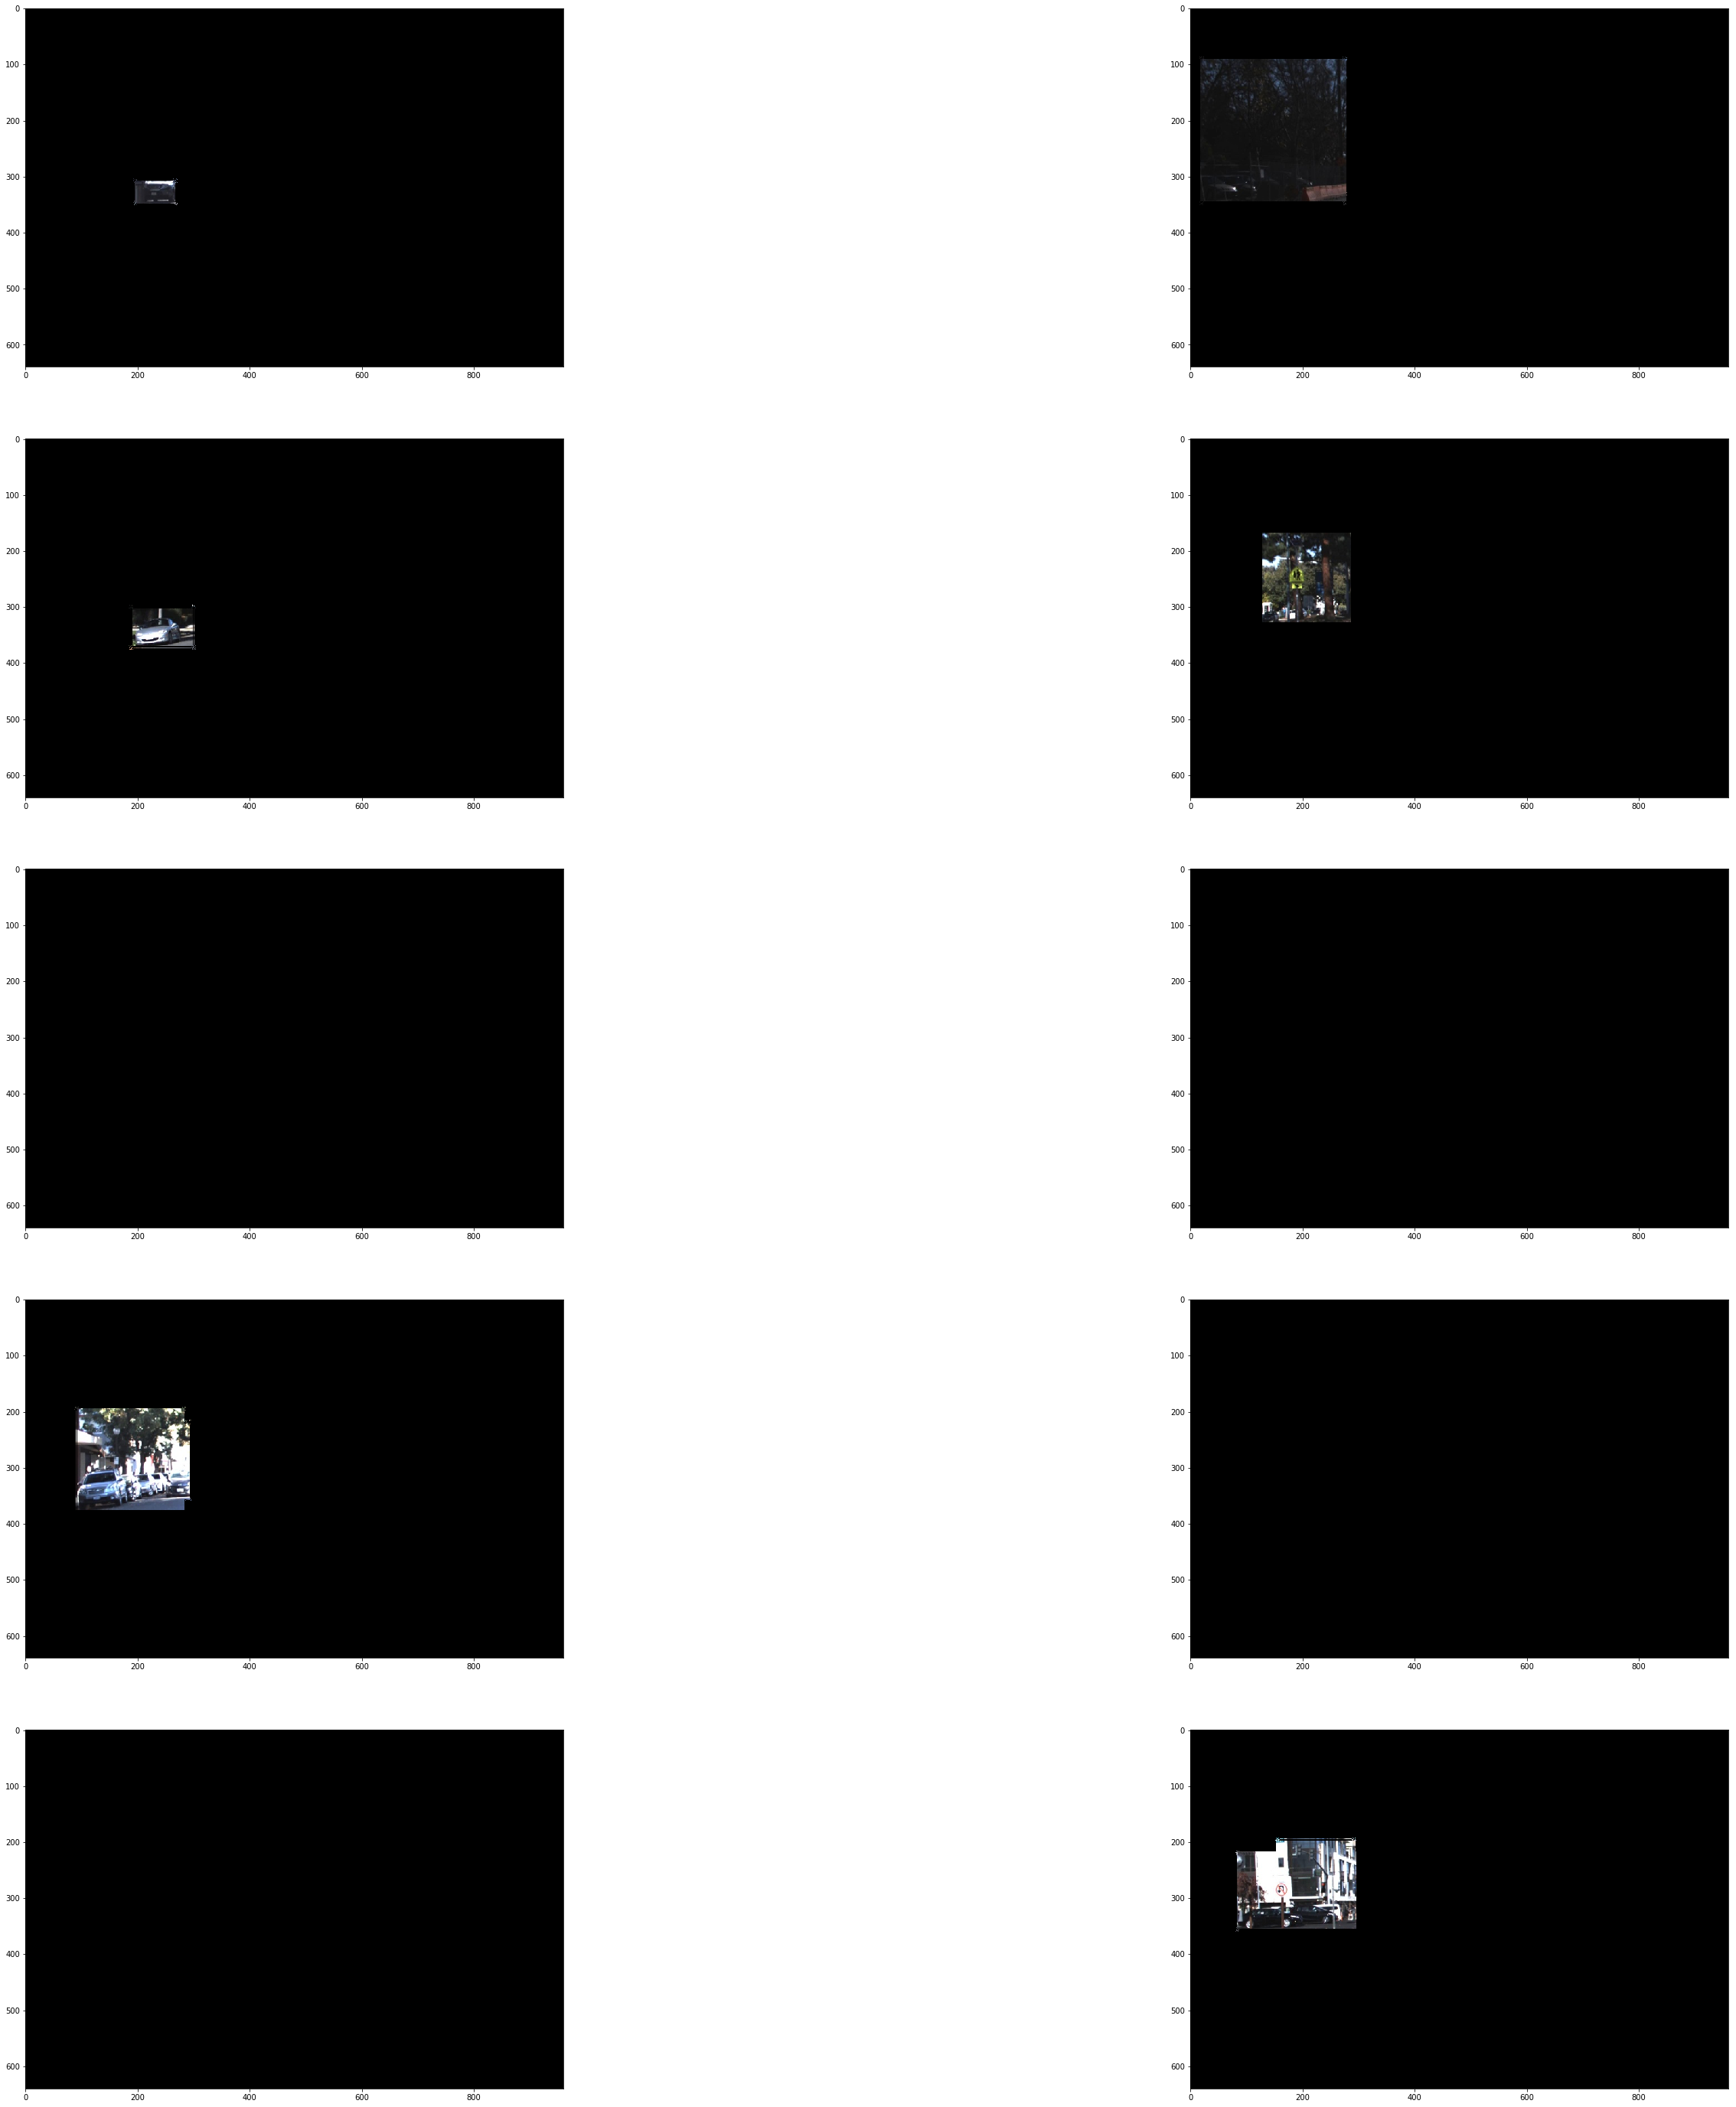

In [5]:
# Select 10 random examples
idx_list = np.random.randint(low = 0, high = paths.shape[0], size=5 * 2)

plt.figure(1, figsize=(50, 50))
for i, idx in enumerate(idx_list):
    plt.subplot(5, 2, i + 1)
    temp(*paths[idx].split("!"))

## Visualize bounding boxes

In [6]:
def plot_bbox(image_path: str, df: pd.DataFrame) -> None:
    image = read_image(image_path)
    df = get_relevant_frames(image_path, df)
    boxes = get_boxes(df)
    
    for box in boxes:
        image = draw_bbox(image, box.left_top, box.right_bot, color=(0, 255, 0), thickness=3)
    
    plt.imshow(image)

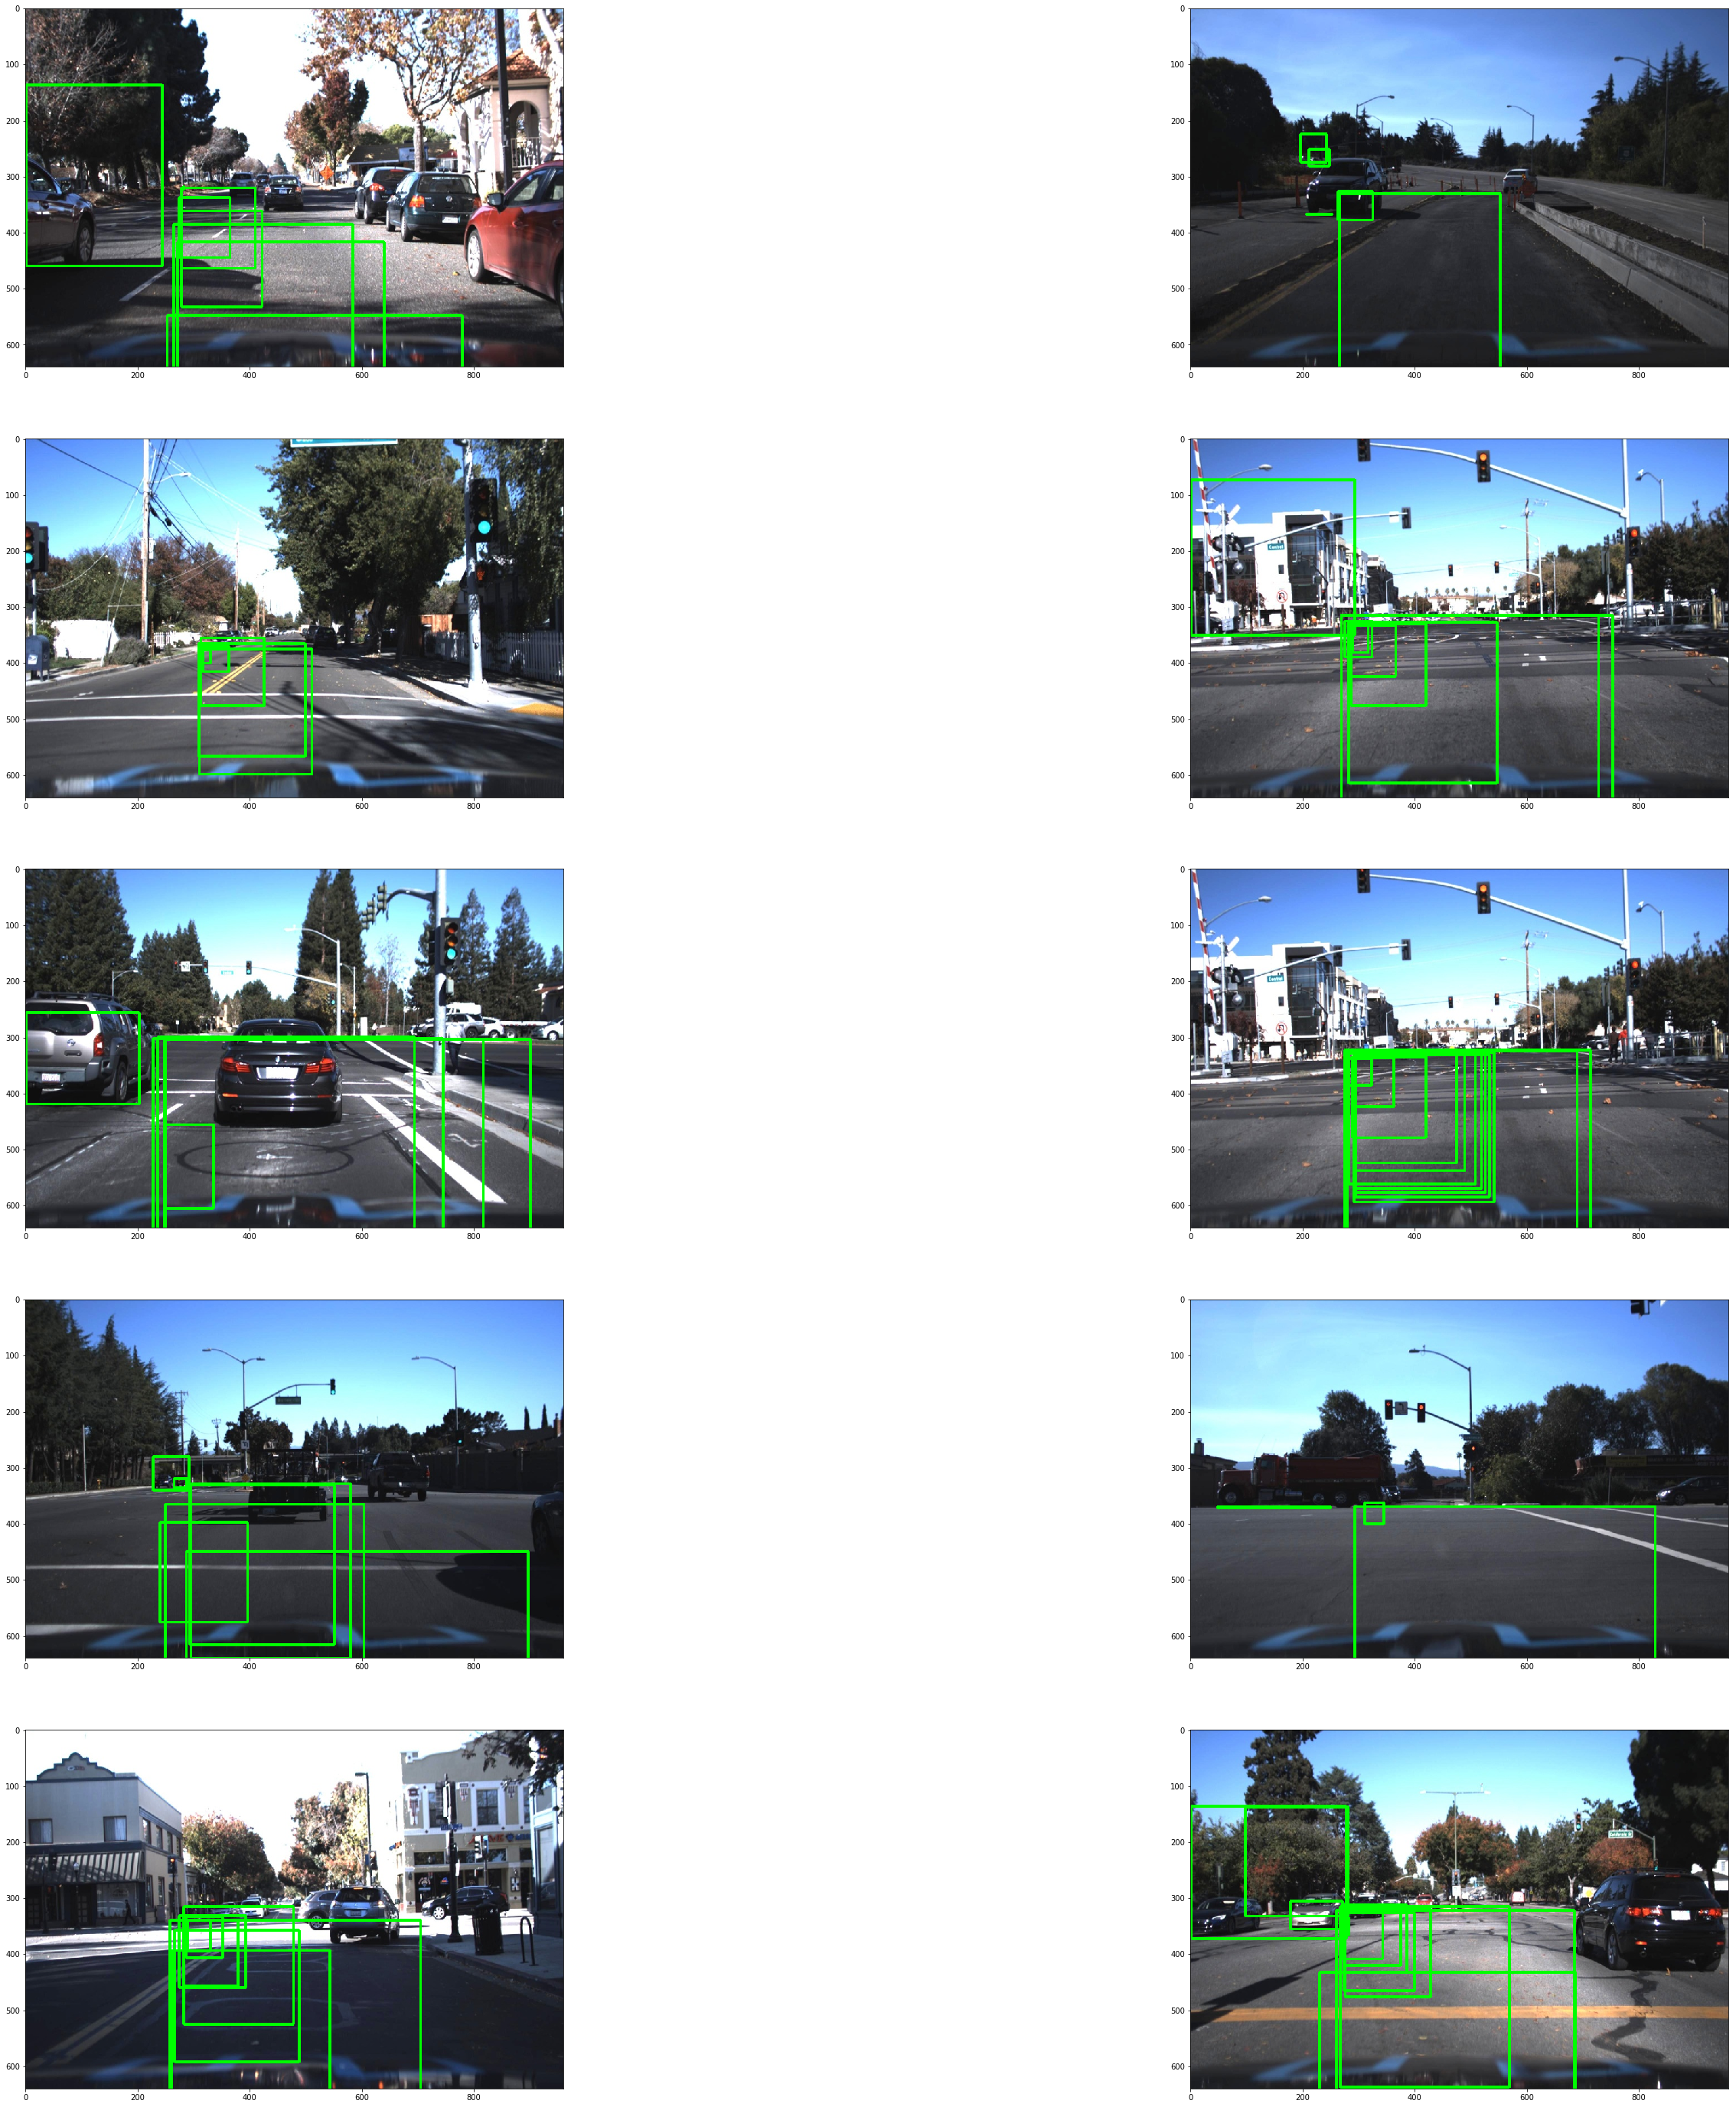

In [7]:
# Select 10 random examples
idx_list = np.random.randint(low = 0, high = paths.shape[0], size=5 * 2)

plt.figure(1, figsize=(50, 50))
for i, idx in enumerate(idx_list):
    plt.subplot(5, 2, i + 1)
    plot_bbox(paths[idx].split("!")[0], labels)

# Split Label into train.csv and test.csv

In [8]:
# Extract 
image_paths = labels["Frame"].unique()
np.random.shuffle(image_paths)
split_idx = int(image_paths.shape[0] * 0.80)

print("train index 0 ~ {} (size: {})".format(split_idx - 1, split_idx))
print("test index {} ~ {} (size: {})".format(split_idx,
                                             image_paths.shape[0] - 1, image_paths.shape[0] - split_idx))

train index 0 ~ 7368 (size: 7369)
test index 7369 ~ 9211 (size: 1843)


In [9]:
train_paths = image_paths[:split_idx]
test_paths = image_paths[split_idx:]

train_paths.shape, test_paths.shape

((7369,), (1843,))

In [10]:
train_csv = labels[labels['Frame'].isin(train_paths)].reset_index(drop=True)
test_csv = labels[labels['Frame'].isin(test_paths)].reset_index(drop=True)

In [11]:
assert train_csv["Frame"].unique().shape[0] == train_paths.shape[0]
assert test_csv["Frame"].unique().shape[0] == test_paths.shape[0]

In [12]:
# only save these two columns
columns = ["Frame", "Mask"]

In [13]:
train_csv[columns].to_csv("train.csv", index=False, header=False)
test_csv[columns].to_csv("test.csv", index=False, header=False)

In [14]:
print("Its all done")

Its all done
